In [3]:
import sklearn
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt

In [27]:
def create_data(N: int, d : int):
    """
    @param N | int | num of samples
    @param d | int | num of features
    returns data | touple (x, y)| x: np.array(N,d), y: (N,1), i.e. 0, 1 
    """
    if N <= 0:
        return data
    else:
        x = np.random.rand(N,d)
        y = []
        for i in range(N):
            y.append(Y_val(x[i]))
        data = (x, y)
        return data
    

def Y_val(xfd: list):
    v = 0.0
    for k in xfd:
        v +=k
    v=v/len(xfd)
    if v >= 0.0 and v < 0.33:
        return 0
    elif v >= 0.33 and v < 0.66:
        return 1
    else:
        return 2
        
        
    
def convert_to_pandas_data_frame(X,Y):
    """
    @param X | list | feature list of samples
    @param Y | list | output/class list of samples
    returns df | pd.DataFrame | X with features and Y
    """
    df = None
    if len(X) != len(Y):
        return df
    else:
        rows = []
        for i in range(len(X)):
            coll_dict = {}
            x = X[i]
            y = Y[i]
            for idx_x, val_x in enumerate(x):
                coll_dict['x-'+str(idx_x)] = val_x # for display only 
            coll_dict['y']=Y[i]
            rows.append(coll_dict)
        df = pd.DataFrame(rows)
        return df
    
def visualize_binary_class_data_by(feature1,feature2,numSamples,myX,myY):
    """
    @param feature1 | int | first index of a feature of a sample
    @param feature2 | int | second index of a feature of a sample
    @param numSample | int | number of samples to visualize
    @param X | list | feature list of samples
    @param Y | list | output/class list of samples
    returns graph with two features and binary class
    """
    color_dict = {0: 'orange', 1: 'green', 2:'red'}
    fig, ax = plt.subplots()
    for i in range(numSamples):
        ax.scatter(myX[i][feature1],myX[i][feature2], c=''+str(color_dict[myY[i]]))
    ax.legend()
    ax.grid(True)
    plt.show()

Creating my data set $D = \{x_i, y_i\}_{i=1}^{N}$

where, $x_i \in \mathbb{R}^2$ and $y_i \in \{0,1\} \text{,} \forall i = 1, 2, 3, ..., N$

No handles with labels found to put in legend.


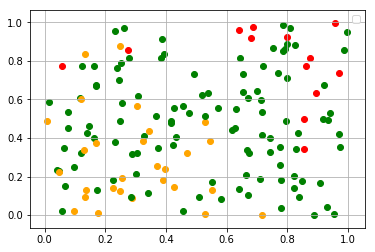

In [28]:
data_X,data_Y = create_data(N=150,d=4)
visualize_binary_class_data_by(feature1=0,feature2=3,numSamples=len(data_X),myX=data_X,myY=data_Y)

### Converting my data to DataFrame for easier operation

In [10]:
data = convert_to_pandas_data_frame(X=data_X, Y=data_Y)
data.head() # see first few rows of DataFrame
data.to_csv("mydata.csv") # save a DataFrame to a file.csv
mydata=pd.read_csv("./mydata.csv", index_col=0)  # load a file.csv to DataFrame
mydata[:10]

,x-0,x-1,x-2,x-3,y
0,0.437140,0.789836,0.889777,0.813268,2
1,0.978507,0.796118,0.230236,0.164786,1
2,0.723136,0.595343,0.321528,0.907032,1
3,0.309732,0.646500,0.115422,0.998028,1
4,0.095351,0.371262,0.453830,0.309835,0
5,0.028401,0.856265,0.104805,0.823647,1
6,0.992174,0.953603,0.261897,0.151054,1
7,0.614284,0.859900,0.922318,0.026365,1
8,0.752661,0.534373,0.360798,0.010151,1
9,0.817890,0.244295,0.967939,0.219922,1


### we will split the data into train and test set

### assumption: we have data.csv ....

In [36]:
data_df = pd.read_csv('iris.csv') # loading data from file
data_df.head()
train_count = int(len(data_df)*0.8)
data_train = data_df[:train_count]
data_test = data_df[train_count:]
print("train data count : ",len(data_train), "\t test data count : ",len(data_test))

train data count :  120 	 test data count :  30


In [37]:
def convert_DataFrame_to_XYList(sample_df):
    y = sample_df["y"].tolist()
    del sample_df["y"]
    x = sample_df.as_matrix()
    return (x, y)

mtrainX, mtrainY = convert_DataFrame_to_XYList(sample_df=data_train)
mtestX, mtestY = convert_DataFrame_to_XYList(sample_df=data_test)

KeyError: 'y'

In [38]:
class KNNModdel:
    
    def __init__(self, trainX, trainY):
        self.train_x = trainX
        self.train_y = trainY
    
        
    def euclidean_dist(self, x1, x2):
        if len(x1) != len(x2):
            return None
        else: 
            dif = []
            for i in range(len(x1)):
                d = (x1[i] - x2[i])*(x1[i] - x2[i])
                dif.append(d)
            add=sum(dif)
        return sqrt(add)
        
    def knn_for_one_sample(self, x_to_predict, k):
        result = None
        dis_vec = [] # will contain euclidian dist of x_to_predict vs. train_x
        for i in range(len(self.train_x)):
            dis_vec.append((self.euclidean_dist(self.train_x[i],x_to_predict),self.train_y[i],i)) 
        dis_vec.sort()
        dis_vec=dis_vec[:k]
        lab_dict_freq= {0:0,1:0,2:0}
        for i in range(k):
            dist,cls,idx = dis_vec[i]
            if cls == 0:
                lab_dict_freq[0] += 1
            elif cls == 1:
                lab_dict_freq[1] += 1
            else:
                lab_dict_freq[2] += 1
        max_val = max([lab_dict_freq[1],lab_dict_freq[2], lab_dict_freq[1]])
        sum_val = (lab_dict_freq[0]+lab_dict_freq[1]+lab_dict_freq[2])
        if lab_dict_freq[0] == max_val: 
            result = (0,(lab_dict_freq[0]/sum_val))
        elif lab_dict_freq[1] == max_val:
            result = (1,(lab_dict_freq[0]/sum_val))       
        else:
            result = (2,(lab_dict_freq[1]/sum_val))
        return result
    
    def predict(self, test_x, k): #returns pred y when test_x is given
        test_y = []
        for i in range(len(test_x)):
            samplex = test_x[i]
            result,prob = self.knn_for_one_sample(x_to_predict=samplex, k=k)
            test_y.append(result)
        return test_y

In [39]:
def get_classes(goldlist):
    return list(set(goldlist)) #Set method returns unique

def get_prec_recl_f1(classname,mygoldlist,mypredlist):
    tp=0
    fp=0
    fn=0
    sp=0
    result=(0,0,0,0)
    if len(mygoldlist) != len(mypredlist):
        return result
    else:
        for i in range(len(mygoldlist)):
            gold=mygoldlist[i]
            pred=mypredlist[i]
            if pred==classname:
                if pred==gold:
                    tp=tp+1
                else:
                    fp=fp+1
            else:
                if gold==classname:
                    fn=fn+1
            if gold==classname:
                sp=sp+1
        prec=0.0
        if (tp+fp) > 0:
            prec = tp/(tp+fp)
        recl=0.0
        if (tp+fp) > 0:
            recl = tp/(tp+fn)
        f1 = 0.0 
        if (prec+recl) > 0:
            f1 = (2*prec*recl)/(prec+recl) 
        result=(round(prec, 2),round(recl, 2),round(f1, 2), sp)
        return result


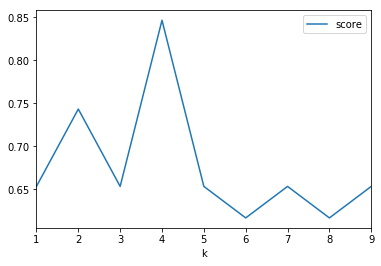

In [41]:
model = KNNModdel(trainX=mtrainX, trainY=mtrainY)
kvalue=[]
score=[]
for ik in range(1,10):
    mpredY = model.predict(test_x=mtestX, k=ik)
    myclasslist = get_classes(mtestY)
    avgf0 =.0
    avgp = 0.
    avgr = 0.
    for c in myclasslist:
        p, r, f1, s = get_prec_recl_f1(classname=c, mygoldlist=mtestY ,mypredlist=mpredY)
        avgf0+=f1
        avgr+=r
        avgp+=p
        
    avgf0/=len(myclasslist) 
    avgp/=len(myclasslist) 
    avgr/=len(myclasslist) 
    #print("k {} avgF1 {} avgP{} avgR{}".format(ik,avgf0,avgp,avgr))
    
    kvalue.append(ik)
    score.append(avgf0)
    
data={"k":kvalue,"score":score}
df=pd.DataFrame.from_dict(data)
df.plot(x='k',y='score')